#### Критерий Манна-Уитни

1. Возьмем данные цен жилья в Альбукерке 
2. Выдвинем гипотезу о том что цены жилья на углу(1) и не на углу(0) (признак COR) не отличаются (гипотеза равенства)
3. Проверим нормальности распределений цен в разрезе по бинарному признаку COR
4. Если нормальное распределение то при

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('Albuquerque Home Prices_data.txt', sep='\t')

In [3]:
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [4]:
df = df.replace(-9999, np.nan)
df.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


Признак COR жилье на углах, проверяем гипотезу отличается ли ценадома на углу от дома на не углу.

In [5]:
cor1 = df[df['COR'] == 1]['PRICE']
cor0 = df[df['COR'] == 0]['PRICE']
cor1.name,cor0.name = 'corner','not corner'

In [6]:
def two_hist(x,y):
    x.hist(alpha = 0.5, weights = [1./len(x)]*len(x), color = 'blue')
    y.hist(alpha = 0.5, weights = [1./len(y)]*len(y), color = 'red')
    plt.axvline(x.mean(), color = 'blue', alpha=0.8, linestyle = 'dashed')
    plt.axvline(y.mean(), color = 'red', alpha = 0.8 , linestyle = '--')
    plt.legend([x.name, y.name])

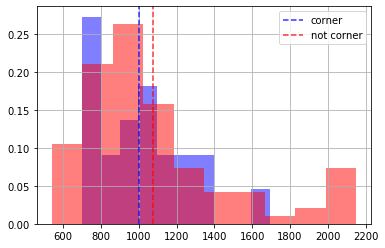

In [7]:
two_hist(cor1,cor0)

В распределении есть очевидные выбросы, которые не дают применить критерий Стьюдента, поэтому применим критерий Манна-Уитни.

In [8]:
res = stats.mannwhitneyu(cor1,cor0)
print('p-value: ',res[1])

p-value:  0.40220407862126695


p-value получилось достаточно большим, критерием проверяется гипотеза о равенстве (ее легко проверить, потому что если проверять неравенство, то там слишком много вариантов, питон не пишет что он проверяет, но он проверяет равенство), 0.40 > 0.05  поэтому цены равны, отклонения медиан случаны.
Вывод дома по цене не отличаются по признаку COR
